In [1]:
# Based on akta_hap.py from Ryan Kibler

#!/home/rdkibler/.conda/envs/pycorn_extractor/bin/python3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pycorn import pc_uni6

In [2]:
'''
This script reads all .zip outputs from AKTA Unicorn software and graphs the normalized UV230 trace from 7-20 mL elution volumes. 

To read the zip file outputs from Unicorn Evaluation, I used the pycorn module @ https://github.com/pyahmed/PyCORN. There is also an online visualization tool at http://pycornweb.appspot.com/.
'''


def get_UV(df, uv, normalize=True,xmin = 0,xmax = 999999):
    uv_code = df.columns[df.columns.str.endswith(f"_{uv}")]
    if len(uv_code) == 0:
        raise ValueError(f"UV {uv} not found!")

    vol_label = f'vol {uv}'
    uv_label = f'uv {uv}'

    df = pd.DataFrame([x[0] for x in df[uv_code].values],columns=[vol_label ,uv_label]).dropna()
    df = df[(df[vol_label] >= xmin) & (df[vol_label] <= xmax)]

    if normalize:
        df[uv_label] = (df[uv_label] - min(df[uv_label])) / (max(df[uv_label]) - min(df[uv_label]))

    return df.reset_index(drop=True)


def parse_file(file):
    #loads the zipped files and parses the xml to collect the data. Returns a pandas dataframe
    fdata = pc_uni6(file)
    fdata.load()
    fdata.xml_parse()
    fdata.clean_up()

    return pd.DataFrame().from_dict({key:fdata[key]['data'] for key in fdata.keys()},orient='index').transpose()

In [3]:
protparams = pd.read_csv('/home/broerman/wetlab/gene_orders/dimeric_hinges/2022-01-05/protparams.csv')
protparams

,Gene ID,Sequence,Molecular Weight,Monoisotopic Molecular Weight,Reduced Molar Extinction Coefficient,Oxidized Molar Extinction Coefficient,Reduced Mass Extinction Coefficient,Oxidized Mass Extinction Coefficient,Isoelectric Point,Instability Index,Aromaticity,Gravy,Charge at pH 8
0,CSD16A_DHR62__pET29b,MSKEKNDEKRKRAEKALQRAQEAEKKGDVREAVRAAQEAVRAAEES...,20737.9055,20725.7560,5500,5500,0.265215,0.265215,6.7693,41.2858,0.0053,-0.7863,-2.0061
1,CSD16B_DHR62__pET29b,MSKEKNDEKRKRAEKALQRAQEAEKKGDVEEAVRAAQEAVRAAKES...,20515.7033,20503.8043,6990,6990,0.340715,0.340715,9.1344,29.6674,0.0105,-0.8384,2.9252
2,CSD17A_hDHR64-5CWM__pET29b,MSKEKDPEDELKRVEKLIKEAKELLRQAQEKGSEEDLEKALRTAEE...,27561.7154,27545.5882,5500,5500,0.199552,0.199552,5.2016,49.3203,0.0081,-0.6809,-16.0283
3,CSD17B_hDHR64-5CWM__pET29b,MSKEKDPEDELKRVEKLVKEAEELLRQAKEKGSEEDLEKALRTAEE...,27377.9133,27361.6631,5500,5500,0.200892,0.200892,6.3589,40.2756,0.0041,-0.5813,-4.0119
4,CSD18A_X18-4-22-4-ct0-ff__pET29b,MSKEKDEVEEIKKELRKEAEKLRREGNEEEAREVEIIARLIEQAVR...,23736.4464,23722.4848,5500,5500,0.231711,0.231711,5.5560,59.9119,0.0048,-0.8657,-10.0500
5,CSD18B_X18-4-22-4-ct0-ff__pET29b,MSKEKDQVEEIKKELRKEAEKLRREGNEEEAREVEEIARIIEEAVR...,23855.5671,23841.6547,5500,5500,0.230554,0.230554,6.1422,51.6248,0.0048,-0.9305,-5.0311
6,CSD19A_X18-4-23-4-ct3-ff__pET29b,MSKEKSAKELADRAADQARKDAEQSTDEKEKKKLEHLAELAREAAE...,23953.3695,23939.4480,6990,6990,0.291817,0.291817,6.0414,47.1556,0.0093,-0.9150,-6.0039
7,CSD19B_X18-4-23-4-ct3-ff__pET29b,MSKEKDSKEVADRAADQARKDAEQSTDEEEKRELEKLAELARRAAE...,23504.7241,23491.0954,5500,5500,0.233996,0.233996,5.6640,66.4949,0.0047,-0.7692,-8.9649
8,CSD20A_X19-3-17-2-ct9-fe__pET29b,MSKEKDELEEAIQLLKELAELAEEQGDQEVAEVAREVSELVKRQGD...,19828.0768,19816.5133,5500,5500,0.277384,0.277384,5.7022,35.0038,0.0055,-0.5912,-8.0032
9,CSD20B_X19-3-17-2-ct9-fe__pET29b,MSKEKDELEKAIQTLKRLAELAEEQGDQEVADLAREVSERVKRQGD...,19770.0321,19758.4530,6990,6990,0.353565,0.353565,6.0015,35.2571,0.0165,-0.4363,-5.9958


Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD16A.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD16B.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD16AB.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD19A.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD19B.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473

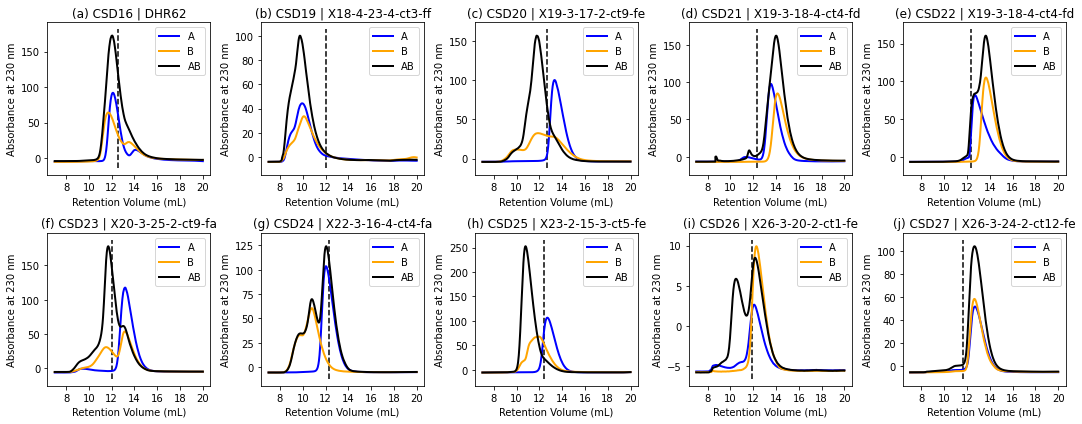

In [5]:
des_names = ['CSD16', 'CSD19', 'CSD20', 'CSD21', 'CSD22', 'CSD23', 'CSD24', 'CSD25', 'CSD26', 'CSD27']
parents = ['DHR62', 'X18-4-23-4-ct3-ff', 'X19-3-17-2-ct9-fe', 'X19-3-18-4-ct4-fd', 'X19-3-18-4-ct4-fd', 'X20-3-25-2-ct9-fa', 'X22-3-16-4-ct4-fa', 'X23-2-15-3-ct5-fe', 'X26-3-20-2-ct1-fe', 'X26-3-24-2-ct12-fe']
fig_letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

protparams_df = pd.read_csv('/home/broerman/wetlab/gene_orders/dimeric_hinges/2022-01-05_CSD_round2/protparams.csv')

# finds the averages of the centers of the predicted monomer and dimer regions- this is the division between those regions
# sep_vols = [np.mean((np.mean((vols[0], vols[2])), vols[4])) for vols in elu_vols]

#initialize graph
fig,axs = plt.subplots(2, 5, figsize=(15,6))

xmin = 7.0
xmax = 20.0

uvs = ['230']

colors = ['blue', 'orange', 'black', 'green', 'magenta', 'yellow', 'red', 'purple', 'cyan', 'wheat', 'grey', 'pink', 'brown', 'springgreen','dodgerblue','darkslategray','darkblue','gainsboro','palegreen', 'crimson', 'lime', 'lightgrey','coral','chocolate']

#get specific zip file, otherwise run on all zips in directory
combos = ['A', 'B', 'AB']

for des_name, parent, letter, ax in zip(des_names, parents, fig_letters, axs.flatten()):
    color_counter = 0

    des_inds = protparams_df['Gene ID'].str.startswith(des_name)
    # des_df.loc[:,'homodimer_MW'] = 2*des_df.loc[:,'Molecular Weight']
    protparams_df.loc[des_inds,'monomer_elution'] = (11.18-13.99)/(44-17)*(protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    protparams_df.loc[des_inds,'homodimer_elution'] = (11.18-13.99)/(44-17)*(2*protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    sep_vol = (protparams_df.loc[des_inds,'monomer_elution'].mean() + protparams_df.loc[des_inds,'homodimer_elution'].mean())/2
    

    files = ['raw/' + des_name + combo + '.zip' for combo in combos]

    for file, combo in zip(files, combos):

        #grab the entire dataset
        full_df = parse_file(file)
        
        df = pd.DataFrame()

        for uv in uvs:
            try:
                df = pd.concat([df,get_UV(full_df, uv, False, xmin, xmax)],axis="columns",ignore_index=False)
            except ValueError:
                print(f'UV {uv} not found in file {file}! Skipping!')
        if df.empty:
            print(f"unable to extract any data from {file}")
            continue

        print(f'Processing png for {file} with UV {", UV ".join(uvs)} from {xmin} to {xmax} mL')
        
        #graph data

        #use column name data instead of args.uv because some of the UVs may have failed
        for uv_label in df.columns[df.columns.str.contains("uv")]:

            vol_label = uv_label.replace("uv","vol")
            df_plot = df[[uv_label,vol_label]]

            df_plot.plot.line(x=vol_label, y=uv_label, ax=ax, color=colors[color_counter], label=combo, linewidth=2)

            color_counter += 1

    # xticks = ax.get_xticks()
    # xticklabels = ax.get_xticklabels()
    # # xticks = np.concatenate((xticks, np.asarray(vols)))
    # # xticklabels += ['A', 'AA', 'B', 'BB', 'AB']
    # xticks = np.concatenate((xticks, np.asarray(vols)))
    # xticklabels += ['Monomer', 'Dimer']
    # ax.set_xticks(xticks)
    # ax.set_xticklabels(xticklabels)
    # ax.set_xticks(vols)
    # ax.set_xticklabels(['Monomer', 'Dimer'])
    ax.set_xticks(np.arange(8, 22, 2))

    ax.plot([sep_vol, sep_vol], ax.get_ylim(), '--', color='black', zorder=0)
    ax.set_xlabel('Retention Volume (mL)')
    ax.set_ylabel('Absorbance at 230 nm')
    ax.set_title(f'({letter}) {des_name} | {parent}')
        
fig.tight_layout()
fig.savefig("csd_binding.png", dpi=300, bbox_inches='tight')

Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
        vol 230    uv 230
0      7.003168 -5.109409
1      7.009809 -5.107697
2      7.016446 -5.108803
3      7.023078 -5.111031
4      7.029719 -5.112027
...         ...       ...
1952  19.972988 -4.173880
1953  19.979628 -4.173995
1954  19.986265 -4.174862
1955  19.992889 -4.175728
1956  19.999527 -4.175859

[1957 rows x 2 columns]
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
        vol 230    uv 230
0      7.002958 -5.227613
1      7.009594 -5.226894
2      7.016228 -5.226696
3      7.022868 -5.226628
4      7.029504 -5.225883
...         ...       ...
1952  19.973005 -2.491104
1953  19.979643 -2.493729
1954  19.986294 -2.494786
1955  19.992929 -2.494938
1956  19.999567 -2.494395

[1957 rows x 2 columns]
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data

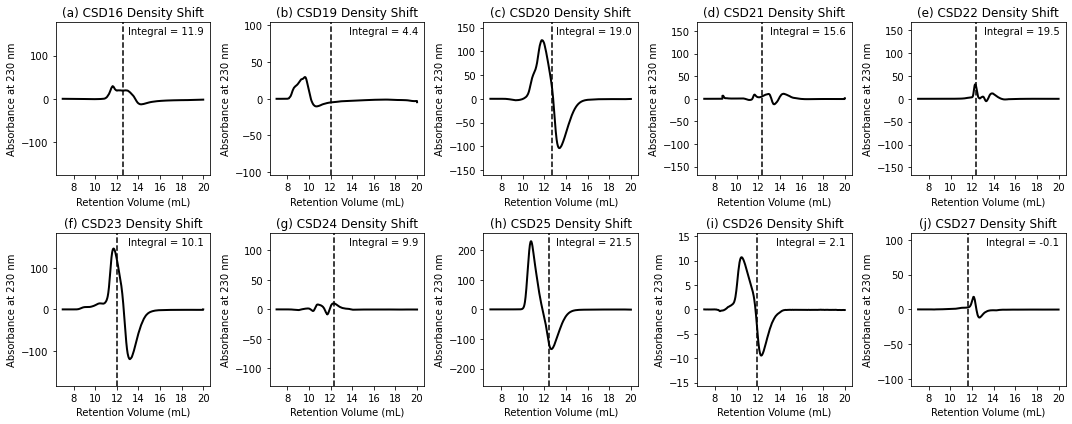

In [19]:
des_names = ['CSD16', 'CSD19', 'CSD20', 'CSD21', 'CSD22', 'CSD23', 'CSD24', 'CSD25', 'CSD26', 'CSD27']
parents = ['DHR62', 'X18-4-23-4-ct3-ff', 'X19-3-17-2-ct9-fe', 'X19-3-18-4-ct4-fd', 'X19-3-18-4-ct4-fd', 'X20-3-25-2-ct9-fa', 'X22-3-16-4-ct4-fa', 'X23-2-15-3-ct5-fe', 'X26-3-20-2-ct1-fe', 'X26-3-24-2-ct12-fe']
fig_letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

protparams_df = pd.read_csv('/home/broerman/wetlab/gene_orders/dimeric_hinges/2022-01-05/protparams.csv')

# finds the averages of the centers of the predicted monomer and dimer regions- this is the division between those regions
# sep_vols = [np.mean((np.mean((vols[0], vols[2])), vols[4])) for vols in elu_vols]

#initialize graph
fig,axs = plt.subplots(2, 5, figsize=(15,6))

xmin = 7.0
xmax = 20.0

uv = '230'

colors = ['blue', 'orange', 'black', 'green', 'magenta', 'yellow', 'red', 'purple', 'cyan', 'wheat', 'grey', 'pink', 'brown', 'springgreen','dodgerblue','darkslategray','darkblue','gainsboro','palegreen', 'crimson', 'lime', 'lightgrey','coral','chocolate']

#get specific zip file, otherwise run on all zips in directory
combos = ['A', 'B', 'AB']

for des_name, parent, letter, ax in zip(des_names, parents, fig_letters, axs.flatten()):
    color_counter = 0

    des_inds = protparams_df['Gene ID'].str.startswith(des_name)
    # des_df.loc[:,'homodimer_MW'] = 2*des_df.loc[:,'Molecular Weight']
    protparams_df.loc[des_inds,'monomer_elution'] = (11.18-13.99)/(44-17)*(protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    protparams_df.loc[des_inds,'homodimer_elution'] = (11.18-13.99)/(44-17)*(2*protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    sep_vol = (protparams_df.loc[des_inds,'monomer_elution'].mean() + protparams_df.loc[des_inds,'homodimer_elution'].mean())/2
    

    files = ['raw/' + des_name + combo + '.zip' for combo in combos]

    combined_uv = pd.Series(dtype='float64')

    vol_len = 0
    max_signal = 0
    for file, combo in zip(files, combos):

        #grab the entire dataset
        full_df = parse_file(file)
        df = get_UV(full_df, uv, False, xmin, xmax)
        print(df)
        
        #graph data

        uv_signal = df['uv ' + uv]
        uv_signal = uv_signal - uv_signal.iloc[0] # subtract baseline
    
        if combo == 'AB':
            combined_uv = combined_uv.add(uv_signal, fill_value=0)
        else:
            combined_uv = combined_uv.sub(uv_signal, fill_value=0)

        if len(df['vol ' + uv]) > vol_len:
            vols = df['vol ' + uv]
            vol_len = len(vols)
        if uv_signal.max() > max_signal:
            max_signal = uv_signal.max()

    ax.plot(vols, combined_uv, color=colors[2], linewidth=2) # if this fails because the x and y vectors don't match, could be because some of the UVs have one more data point than the others

    # integral = np.trapz(combined_uv - combined_uv.iloc[0], vols) # subtracts the baseline and integrates
    integral = np.trapz(combined_uv, vols) # subtracts the baseline and integrates

    ax.set_xticks(np.arange(8, 22, 2))
    ax.set_ylim(-max_signal, max_signal)
    ax.plot([sep_vol, sep_vol], ax.get_ylim(), '--', color='black', zorder=0)
    ax.text(0.96, 0.94, f'Integral = {integral:.01f}', horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel('Retention Volume (mL)')
    ax.set_ylabel('Absorbance at 230 nm')
    ax.set_title(f'({letter}) {des_name} Density Shift')
        
fig.tight_layout()
fig.savefig("csd_binding_density_shift.png", dpi=300, bbox_inches='tight')

In [34]:
# plot sap against homodimerization

import pandas as pd

des_names = ['CSD16', 'CSD19', 'CSD20', 'CSD21', 'CSD22', 'CSD23', 'CSD24', 'CSD25', 'CSD26', 'CSD27']
design_dict = {
    'CSD16A': ('aggregate', 'nonworking'),
    'CSD16B': ('aggregate', 'nonworking'),
    'CSD19A': ('aggregate', 'nonworking'),
    'CSD19B': ('aggregate', 'nonworking'),
    'CSD20A': ('monomer', 'working'),
    'CSD20B': ('aggregate', 'working'),
    'CSD21A': ('monomer', 'nonworking'),
    'CSD21B': ('monomer', 'nonworking'),
    'CSD22A': ('monomer', 'nonworking'),
    'CSD22B': ('monomer', 'nonworking'),
    'CSD23A': ('monomer', 'working'),
    'CSD23B': ('aggregate', 'working'),
    'CSD24A': ('monomer', 'nonworking'),
    'CSD24B': ('aggregate', 'nonworking'),
    'CSD25A': ('monomer', 'working'),
    'CSD25B': ('aggregate', 'working'),
    'CSD26A': ('monomer', 'working'),
    'CSD26B': ('monomer', 'working'),
    'CSD27A': ('monomer', 'nonworking'),
    'CSD27B': ('monomer', 'nonworking')
}
design_df = pd.DataFrame.from_dict(design_dict, orient='index', columns=['alone_state', 'function'])
design_df

,alone_state,function
CSD16A,aggregate,nonworking
CSD16B,aggregate,nonworking
CSD19A,aggregate,nonworking
CSD19B,aggregate,nonworking
CSD20A,monomer,working
CSD20B,aggregate,working
CSD21A,monomer,nonworking
CSD21B,monomer,nonworking
CSD22A,monomer,nonworking
CSD22B,monomer,nonworking


In [35]:
from glob import glob

sap_monomer_df = pd.DataFrame(index=design_df.index, columns=['sap_X'])

# get the saps from the score line at the bottom of the pdbs... yeah...
for des_name in des_names:
    pdb_path = glob('/home/broerman/wetlab/gene_orders/dimeric_hinges/2022-01-05_CSD_round2/designs/' + des_name + '*.pdb')[0]
    
    with open(pdb_path, 'r') as pdb_file:
        for line in pdb_file.readlines():
            if line.startswith('sap_A_X'):
                # rstrip removes terminal spaces, so line_split will only have more than one element if this line lists some clash-resolved resis
                line_split = line.rstrip().split(' ')
                if len(line_split) > 1:
                    sap_monomer_df.loc[des_name + 'A', 'sap_X'] = float(line_split[1])
            elif line.startswith('sap_B_X'):
                # rstrip removes terminal spaces, so line_split will only have more than one element if this line lists some clash-resolved resis
                line_split = line.rstrip().split(' ')
                if len(line_split) > 1:
                    sap_monomer_df.loc[des_name + 'B', 'sap_X'] = float(line_split[1])

design_df = pd.concat([design_df, sap_monomer_df], axis=1)
design_df

,alone_state,function,sap_X
CSD16A,aggregate,nonworking,23.2523
CSD16B,aggregate,nonworking,11.2656
CSD19A,aggregate,nonworking,28.0017
CSD19B,aggregate,nonworking,25.3822
CSD20A,monomer,working,19.0621
CSD20B,aggregate,working,26.7507
CSD21A,monomer,nonworking,18.4194
CSD21B,monomer,nonworking,17.3895
CSD22A,monomer,nonworking,17.3482
CSD22B,monomer,nonworking,20.4288


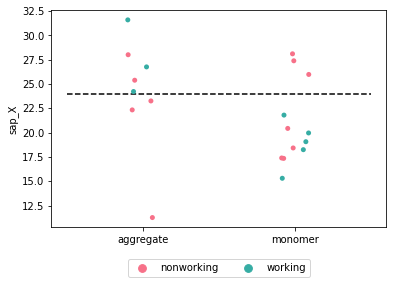

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.scatterplot(x='alone_state', y='sap_X', data=design_df, hue='working', palette='husl')

# fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.stripplot(
    # ax=ax,
    x="alone_state",
    y="sap_X",
    data=design_df,
    hue='function',
    palette='husl'
)

ax.set_xlabel('')
ax.plot(ax.get_xlim(), [24, 24], '--', color='black', zorder=0)
plt.legend(ncol=2, loc='lower center', bbox_to_anchor=(0.5,-0.25))
plt.savefig("csd_alone_state_vs_sap.png", dpi=300, bbox_inches='tight')

Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20A.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20B.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20AB.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD23A.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD23B.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473

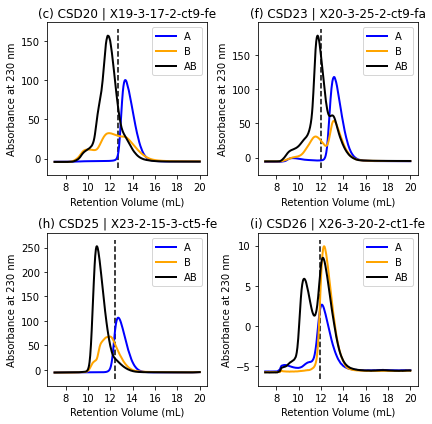

In [6]:
des_names = ['CSD20', 'CSD23', 'CSD25', 'CSD26']
parents = ['X19-3-17-2-ct9-fe', 'X20-3-25-2-ct9-fa', 'X23-2-15-3-ct5-fe', 'X26-3-20-2-ct1-fe']
fig_letters = ['c', 'f', 'h', 'i']

protparams_df = pd.read_csv('/home/broerman/wetlab/gene_orders/dimeric_hinges/2022-01-05_CSD_round2/protparams.csv')

# finds the averages of the centers of the predicted monomer and dimer regions- this is the division between those regions
# sep_vols = [np.mean((np.mean((vols[0], vols[2])), vols[4])) for vols in elu_vols]

#initialize graph
fig,axs = plt.subplots(2, 2, figsize=(6,6))

xmin = 7.0
xmax = 20.0

uvs = ['230']

colors = ['blue', 'orange', 'black', 'green', 'magenta', 'yellow', 'red', 'purple', 'cyan', 'wheat', 'grey', 'pink', 'brown', 'springgreen','dodgerblue','darkslategray','darkblue','gainsboro','palegreen', 'crimson', 'lime', 'lightgrey','coral','chocolate']

#get specific zip file, otherwise run on all zips in directory
combos = ['A', 'B', 'AB']

for des_name, parent, letter, ax in zip(des_names, parents, fig_letters, axs.flatten()):
    color_counter = 0

    des_inds = protparams_df['Gene ID'].str.startswith(des_name)
    # des_df.loc[:,'homodimer_MW'] = 2*des_df.loc[:,'Molecular Weight']
    protparams_df.loc[des_inds,'monomer_elution'] = (11.18-13.99)/(44-17)*(protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    protparams_df.loc[des_inds,'homodimer_elution'] = (11.18-13.99)/(44-17)*(2*protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    sep_vol = (protparams_df.loc[des_inds,'monomer_elution'].mean() + protparams_df.loc[des_inds,'homodimer_elution'].mean())/2
    

    files = ['raw/' + des_name + combo + '.zip' for combo in combos]

    for file, combo in zip(files, combos):

        #grab the entire dataset
        full_df = parse_file(file)
        
        df = pd.DataFrame()

        for uv in uvs:
            try:
                df = pd.concat([df,get_UV(full_df, uv, False, xmin, xmax)],axis="columns",ignore_index=False)
            except ValueError:
                print(f'UV {uv} not found in file {file}! Skipping!')
        if df.empty:
            print(f"unable to extract any data from {file}")
            continue

        print(f'Processing png for {file} with UV {", UV ".join(uvs)} from {xmin} to {xmax} mL')
        
        #graph data

        #use column name data instead of args.uv because some of the UVs may have failed
        for uv_label in df.columns[df.columns.str.contains("uv")]:

            vol_label = uv_label.replace("uv","vol")
            df_plot = df[[uv_label,vol_label]]

            df_plot.plot.line(x=vol_label, y=uv_label, ax=ax, color=colors[color_counter], label=combo, linewidth=2)

            color_counter += 1

    # xticks = ax.get_xticks()
    # xticklabels = ax.get_xticklabels()
    # # xticks = np.concatenate((xticks, np.asarray(vols)))
    # # xticklabels += ['A', 'AA', 'B', 'BB', 'AB']
    # xticks = np.concatenate((xticks, np.asarray(vols)))
    # xticklabels += ['Monomer', 'Dimer']
    # ax.set_xticks(xticks)
    # ax.set_xticklabels(xticklabels)
    # ax.set_xticks(vols)
    # ax.set_xticklabels(['Monomer', 'Dimer'])
    ax.set_xticks(np.arange(8, 22, 2))

    ax.plot([sep_vol, sep_vol], ax.get_ylim(), '--', color='black', zorder=0)
    ax.set_xlabel('Retention Volume (mL)')
    ax.set_ylabel('Absorbance at 230 nm')
    ax.set_title(f'({letter}) {des_name} | {parent}')
        
fig.tight_layout()
fig.savefig("csd_binding_working.png", dpi=300, bbox_inches='tight')

Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
        vol 230    uv 230
0      7.000528 -3.903615
1      7.007164 -3.899578
2      7.013798 -3.897440
3      7.020438 -3.901644
4      7.027080 -3.904827
...         ...       ...
1952  19.970604 -3.554120
1953  19.977243 -3.554780
1954  19.983883 -3.556757
1955  19.990519 -3.560156
1956  19.997156 -3.562728

[1957 rows x 2 columns]
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
        vol 230    uv 230
0      7.005609 -4.107002
1      7.012247 -4.106202
2      7.018884 -4.107251
3      7.025517 -4.107760
4      7.032154 -4.109167
...         ...       ...
1951  19.969036 -3.423423
1952  19.975672 -3.423269
1953  19.982304 -3.422602
1954  19.988945 -3.422327
1955  19.995586 -3.423089

[1956 rows x 2 columns]
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data

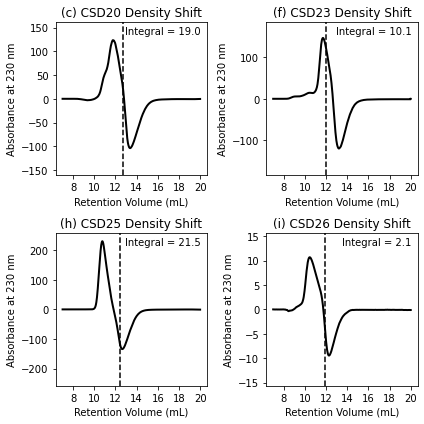

In [9]:
des_names = ['CSD20', 'CSD23', 'CSD25', 'CSD26']
parents = ['X19-3-17-2-ct9-fe', 'X20-3-25-2-ct9-fa', 'X23-2-15-3-ct5-fe', 'X26-3-20-2-ct1-fe']
fig_letters = ['c', 'f', 'h', 'i']

protparams_df = pd.read_csv('/home/broerman/wetlab/gene_orders/dimeric_hinges/2022-01-05_CSD_round2/protparams.csv')

# finds the averages of the centers of the predicted monomer and dimer regions- this is the division between those regions
# sep_vols = [np.mean((np.mean((vols[0], vols[2])), vols[4])) for vols in elu_vols]

#initialize graph
fig,axs = plt.subplots(2, 2, figsize=(6,6))

xmin = 7.0
xmax = 20.0

uv = '230'

colors = ['blue', 'orange', 'black', 'green', 'magenta', 'yellow', 'red', 'purple', 'cyan', 'wheat', 'grey', 'pink', 'brown', 'springgreen','dodgerblue','darkslategray','darkblue','gainsboro','palegreen', 'crimson', 'lime', 'lightgrey','coral','chocolate']

#get specific zip file, otherwise run on all zips in directory
combos = ['A', 'B', 'AB']

for des_name, parent, letter, ax in zip(des_names, parents, fig_letters, axs.flatten()):
    color_counter = 0

    des_inds = protparams_df['Gene ID'].str.startswith(des_name)
    # des_df.loc[:,'homodimer_MW'] = 2*des_df.loc[:,'Molecular Weight']
    protparams_df.loc[des_inds,'monomer_elution'] = (11.18-13.99)/(44-17)*(protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    protparams_df.loc[des_inds,'homodimer_elution'] = (11.18-13.99)/(44-17)*(2*protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    sep_vol = (protparams_df.loc[des_inds,'monomer_elution'].mean() + protparams_df.loc[des_inds,'homodimer_elution'].mean())/2
    

    files = ['raw/' + des_name + combo + '.zip' for combo in combos]

    combined_uv = pd.Series(dtype='float64')

    vol_len = 0
    max_signal = 0
    for file, combo in zip(files, combos):

        #grab the entire dataset
        full_df = parse_file(file)
        df = get_UV(full_df, uv, False, xmin, xmax)
        print(df)
        
        #graph data

        uv_signal = df['uv ' + uv]
        uv_signal = uv_signal - uv_signal.iloc[0] # subtract baseline
    
        if combo == 'AB':
            combined_uv = combined_uv.add(uv_signal, fill_value=0)
        else:
            combined_uv = combined_uv.sub(uv_signal, fill_value=0)

        if len(df['vol ' + uv]) > vol_len:
            vols = df['vol ' + uv]
            vol_len = len(vols)
        if uv_signal.max() > max_signal:
            max_signal = uv_signal.max()

    ax.plot(vols, combined_uv, color=colors[2], linewidth=2) # if this fails because the x and y vectors don't match, could be because some of the UVs have one more data point than the others

    # integral = np.trapz(combined_uv - combined_uv.iloc[0], vols) # subtracts the baseline and integrates
    integral = np.trapz(combined_uv, vols) # subtracts the baseline and integrates

    ax.set_xticks(np.arange(8, 22, 2))
    ax.set_ylim(-max_signal, max_signal)
    ax.plot([sep_vol, sep_vol], ax.get_ylim(), '--', color='black', zorder=0)
    ax.text(0.96, 0.94, f'Integral = {integral:.01f}', horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel('Retention Volume (mL)')
    ax.set_ylabel('Absorbance at 230 nm')
    ax.set_title(f'({letter}) {des_name} Density Shift')
        
fig.tight_layout()
fig.savefig("csd_binding_density_shift_working.png", dpi=300, bbox_inches='tight')